In [1]:
import pandas as pd

In [3]:
beer=pd.read_csv('E:/jupyter/data.txt',sep=' ')
X=beer[['calories','sodium','alcohol','cost']]
##当需要用K-means来聚类时倒入函数
from sklearn.cluster import KMeans

In [4]:
km=KMeans(n_clusters=3).fit(X)
km2=KMeans(n_clusters=2).fit(X)

In [8]:
#X
print(km.labels_)
print(km2.labels_)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [9]:
beer['cluster']=km.labels_
beer['cluster2']=km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
10,Coors,140,18,4.6,0.44,0,0


In [14]:
from pandas.tools.plotting import scatter_matrix 
%matplotlib inline

In [15]:
cluster_center=km.cluster_centers_
cluster_center_2=km2.cluster_centers_
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,0
1,70.00,10.5,2.600000,0.420000,1
2,102.75,10.0,4.075000,0.440000,1


In [16]:
##绘图
centers=beer.groupby('cluster').mean().reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,0
1,1,70.00,10.5,2.600000,0.420000,1
2,2,102.75,10.0,4.075000,0.440000,1


In [17]:
cluster_center

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ],
       [102.75      ,  10.        ,   4.075     ,   0.44      ]])

In [18]:
cluster_center_2

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [ 91.83333333,  10.16666667,   3.58333333,   0.43333333]])

Text(0, 0.5, 'Alcohol')

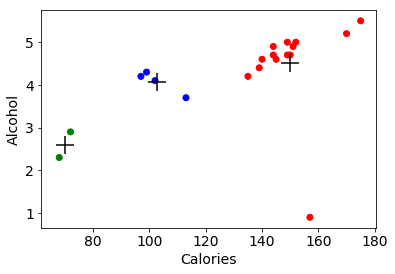

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
import numpy as np
colors=np.array(['red','green','blue','yellow'])
plt.scatter(beer['calories'],beer['alcohol'],c=colors[beer['cluster']])
plt.scatter(centers.calories,centers.alcohol,linewidths=3,marker='+',s=300,c='black')
plt.xlabel('Calories')
plt.ylabel('Alcohol')

D:\cainiao\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5, 0.98, 'With 3 centroids initialized')

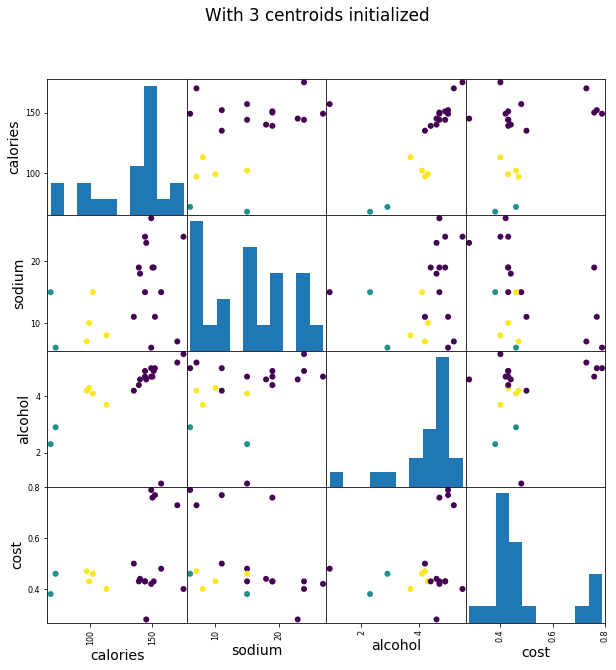

In [30]:
##将四个特征中两两特征的散点图
scatter_matrix(beer[['calories','sodium','alcohol','cost']],marker='o',alpha=1,c=beer['cluster'],figsize=(10,10))
plt.suptitle('With 3 centroids initialized')

D:\cainiao\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5, 0.98, 'With 2 centroids initialized')

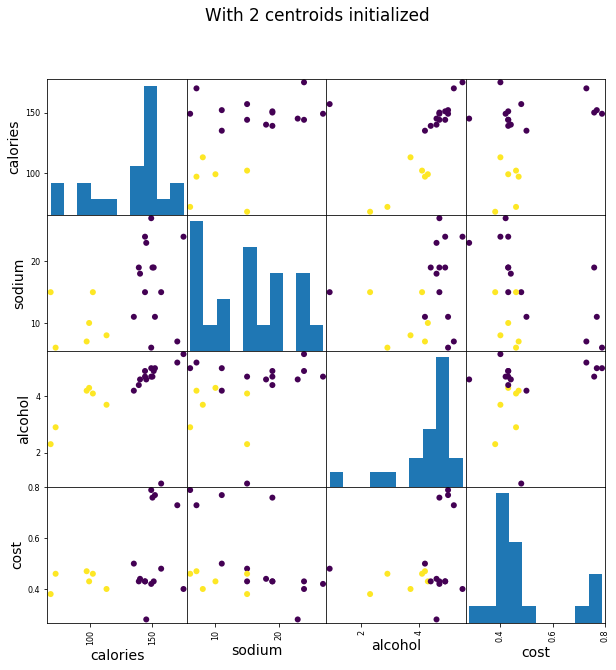

In [28]:
##将四个特征中两两特征的散点图
scatter_matrix(beer[['calories','sodium','alcohol','cost']],marker='o',alpha=1,c=beer['cluster2'],figsize=(10,10))
plt.suptitle('With 2 centroids initialized')

**引入轮廓系数**

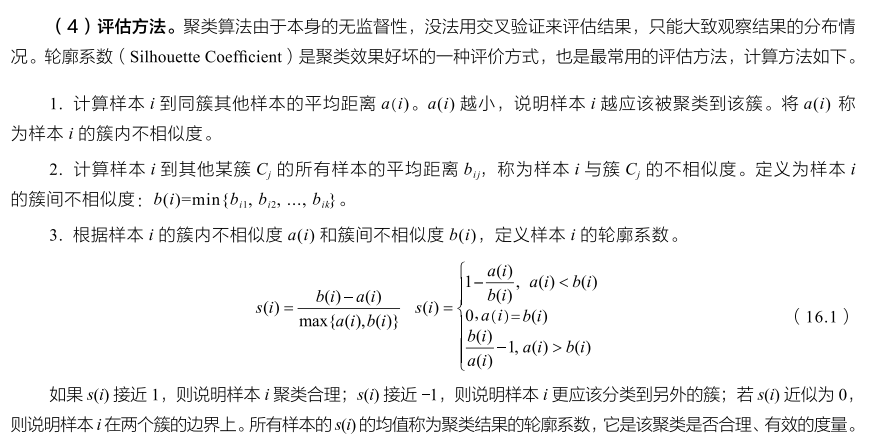

Text(0, 0.5, 'Sihouette Score')

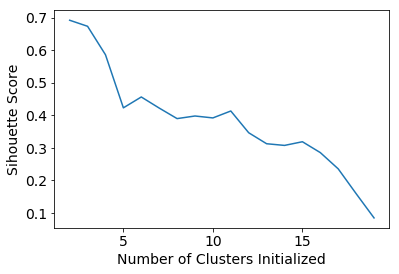

In [34]:
from sklearn import metrics
#score_scaled=metrics.silhouette_score(X,beer.scaled_cluster)
score=metrics.silhouette_score(X,beer.cluster)
scores=[]

for k in range(2,20):
    labels=KMeans(n_clusters=k).fit(X).labels_
    score=metrics.silhouette_score(X,labels)
    scores.append(score)
plt.plot(list(range(2,20)),scores)
plt.xlabel('Number of Clusters Initialized')
plt.ylabel('Sihouette Score')

**当聚类为2时，轮廓系数更接近于1，更合适。**

**DBSCAN**

In [37]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10,min_samples=2).fit(X)
labels=db.labels_
beer['cluster_db']=labels
beer.sort_values('cluster_db')
beer.groupby('cluster_db').mean()


,calories,sodium,alcohol,cost,cluster,cluster2
cluster_db,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.333333
0,146.250000,17.250000,4.383333,0.513333,0.000000,0.000000
1,99.333333,10.666667,4.200000,0.453333,2.000000,1.000000
2,70.000000,10.500000,2.600000,0.420000,1.000000,1.000000


D:\cainiao\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262B09506A0>,
      dtype=object)

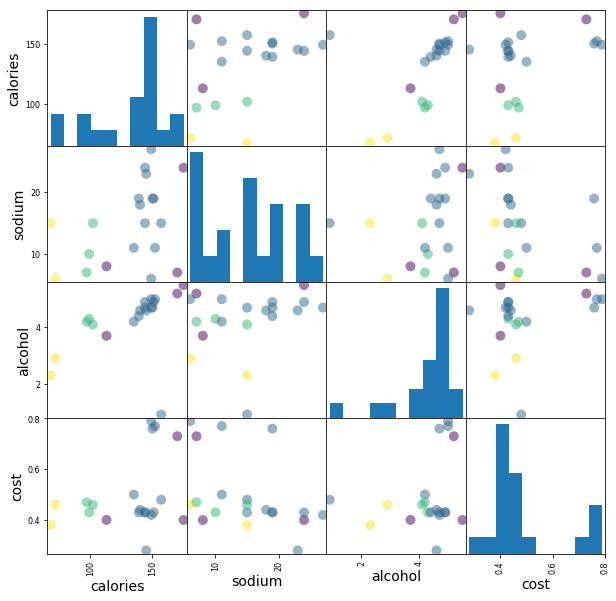

In [38]:
pd.scatter_matrix(X,marker='o',c=beer.cluster_db,figsize=(10,10),s=100)


## 实例

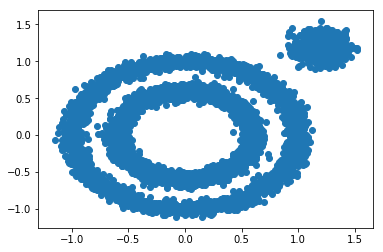

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,
                                      noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]],
               random_state=9)

X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

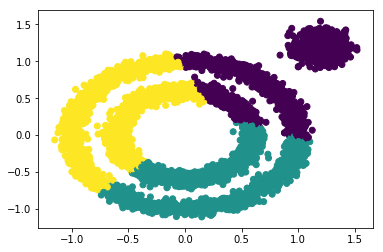

In [40]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

**K-Means对于非凸数据集的聚类表现不好。**

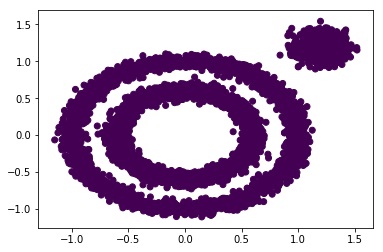

In [41]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

**DBSCAN调参**

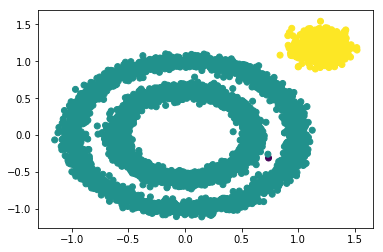

In [42]:
y_pred = DBSCAN(eps = 0.1).fit_predict(X)##距离阈值
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

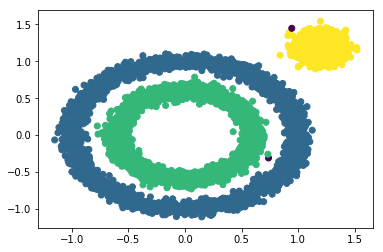

In [43]:
y_pred = DBSCAN(eps = 0.1,min_samples=10).fit_predict(X)##距离阈值和样本阈值
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()